# ***This Code is prepared by Afshin Marani and Zahra Mohammadi for Group 13***

# Machine Learning Avenues in Solving Partial Differential Equations (PDEs)


# Case Study 2: Solution of A Practical PDE: Heat Transfer through a Building Wall

Importing the required built-in libraries for data preprocessing, data visualization, algorithm implementation, and error metrics

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Importing and preprocessing the dataset

In [4]:
dataset2=pd.read_excel('C:/Users/Afshin/Desktop/Temp. Needed/UWO/Winter Semester/ECE 9309/Project/Python/dataset.xlsx', dtype='float64')


Changing the label of features for convenience in coding process

In [5]:
dataset2

,Interior T,Initial T,Ambient,Thickness,k,Time,Temperature
0,23.0,14.0,28.7,10.0,1.75,0.0,14.001608
1,23.0,14.0,28.0,10.0,1.75,60.0,15.895814
2,23.0,14.0,28.0,10.0,1.75,120.0,17.181929
3,23.0,14.0,28.0,10.0,1.75,180.0,18.318986
4,23.0,14.0,27.9,10.0,1.75,240.0,19.201812
5,23.0,14.0,27.9,10.0,1.75,300.0,20.064914
6,23.0,14.0,27.9,10.0,1.75,360.0,20.884878
7,23.0,14.0,27.9,10.0,1.75,420.0,21.666281
8,23.0,14.0,27.9,10.0,1.75,480.0,22.439691
9,23.0,14.0,27.9,10.0,1.75,540.0,23.158656


Defining input and output attributes

In [6]:
data=dataset2.drop('Initial T', axis=1)
Output= dataset2.Temperature
Input = data.drop('Temperature', axis=1)
X=Input
y=Output

In [7]:
X

,Interior T,Ambient,Thickness,k,Time
0,23.0,28.7,10.0,1.75,0.0
1,23.0,28.0,10.0,1.75,60.0
2,23.0,28.0,10.0,1.75,120.0
3,23.0,28.0,10.0,1.75,180.0
4,23.0,27.9,10.0,1.75,240.0
5,23.0,27.9,10.0,1.75,300.0
6,23.0,27.9,10.0,1.75,360.0
7,23.0,27.9,10.0,1.75,420.0
8,23.0,27.9,10.0,1.75,480.0
9,23.0,27.9,10.0,1.75,540.0


Description of data

In [8]:
des=data.describe()
description=pd.DataFrame(des)
description


,Interior T,Ambient,Thickness,k,Time,Temperature
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,22.000000,31.308000,11.555556,2.583333,720.000000,23.400179
std,5.358097,3.594646,6.723300,1.737343,432.987003,4.914696
min,15.000000,27.900000,2.000000,1.000000,0.000000,14.000176
25%,15.000000,28.000000,10.000000,1.000000,360.000000,19.709101
50%,23.000000,29.900000,10.000000,1.750000,720.000000,23.602757
75%,28.000000,34.500000,20.000000,5.000000,1080.000000,27.270112
max,28.000000,38.400000,20.000000,5.000000,1440.000000,32.861012


Data information

In [9]:
inf=data.info()
inf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 6 columns):
Interior T     675 non-null float64
Ambient        675 non-null float64
Thickness      675 non-null float64
k              675 non-null float64
Time           675 non-null float64
Temperature    675 non-null float64
dtypes: float64(6)
memory usage: 31.7 KB


Checking for missing values

In [10]:
print ('Missing Values:')
print (data.isnull().sum())

Missing Values:
Interior T     0
Ambient        0
Thickness      0
k              0
Time           0
Temperature    0
dtype: int64


Dataset visualization

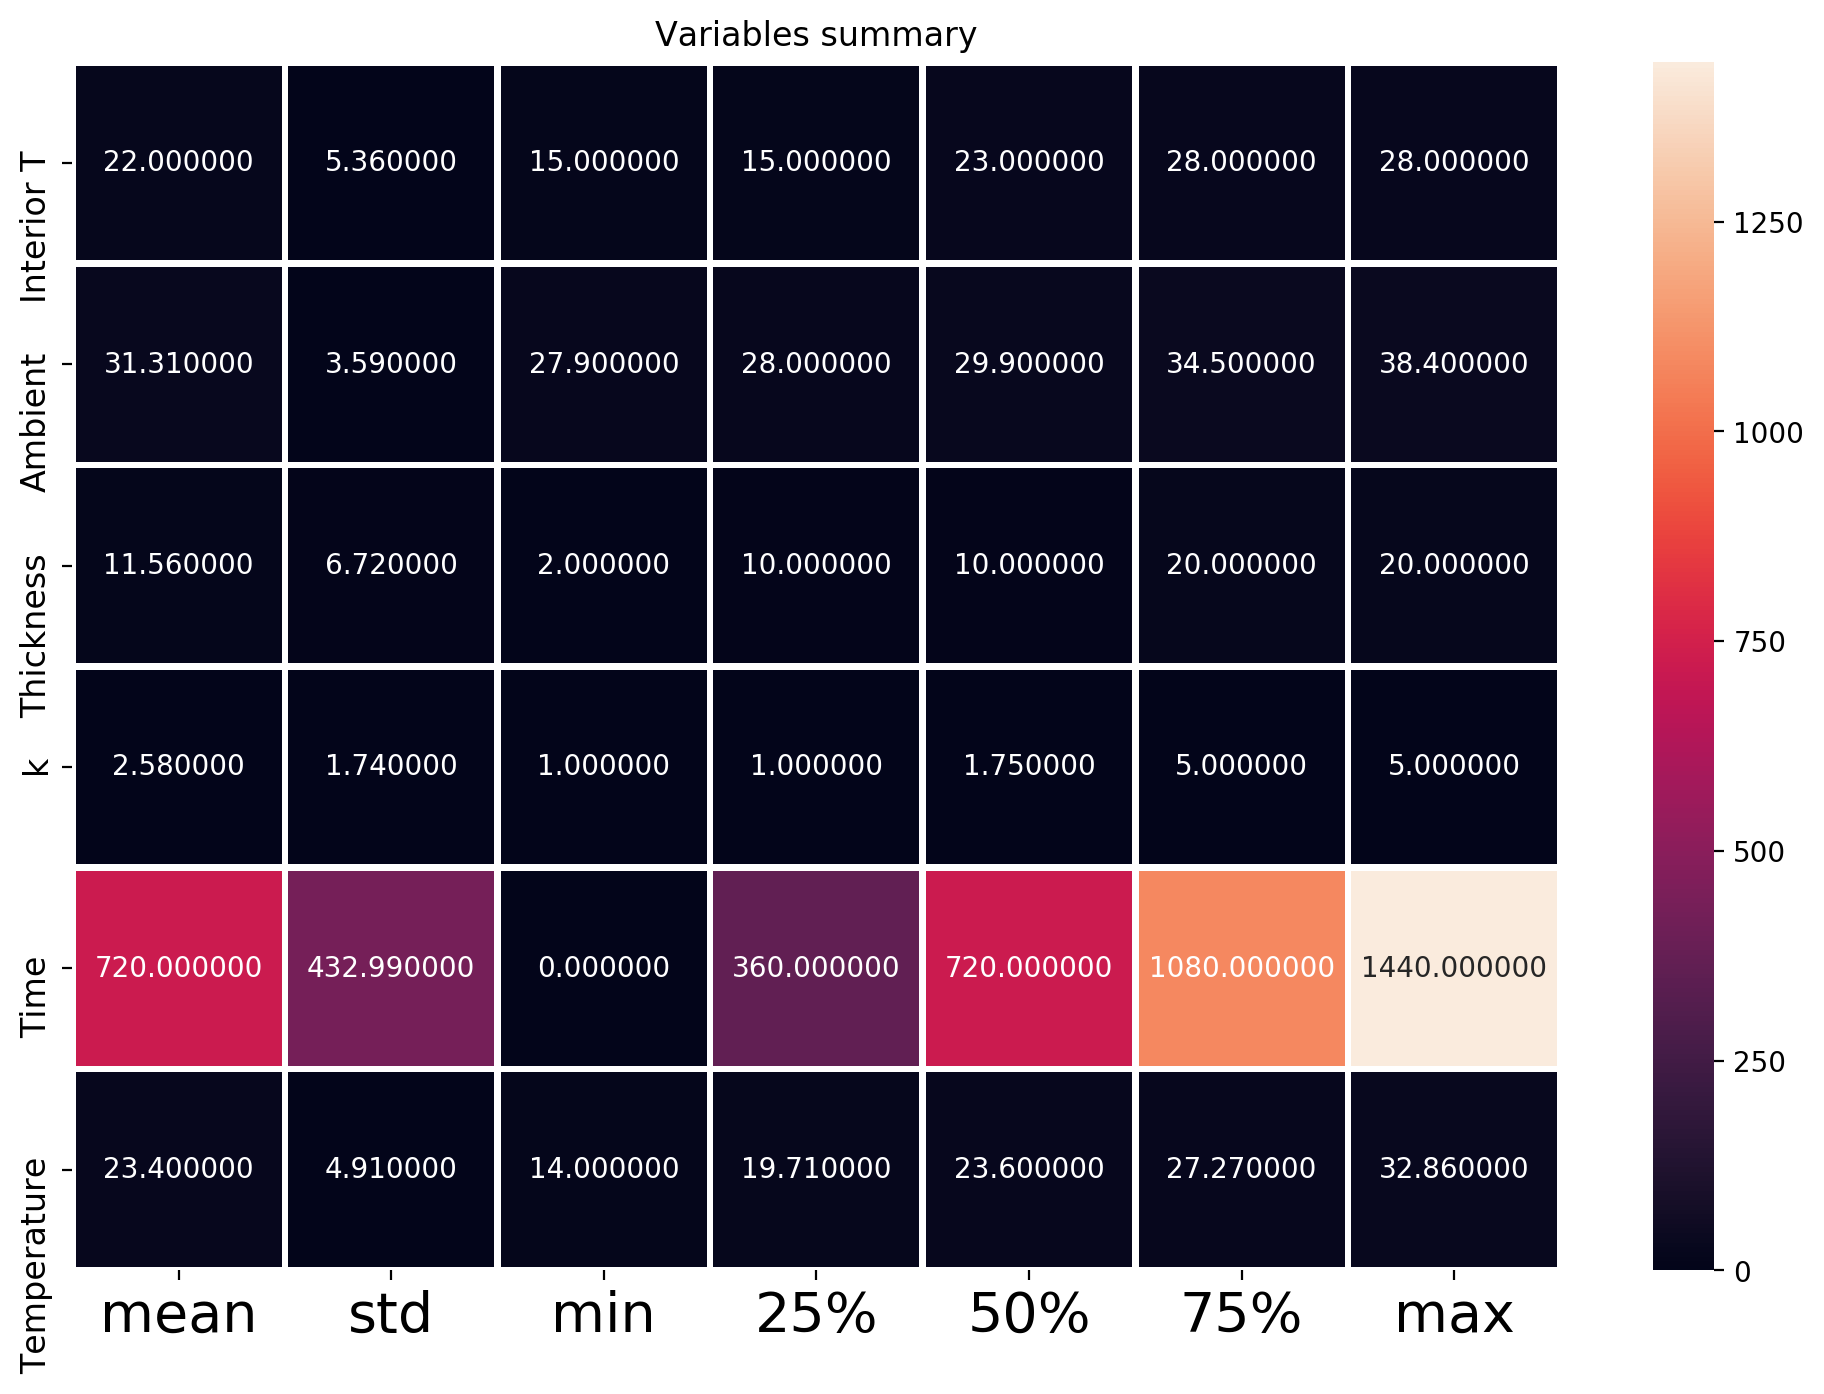

Correlation:


,Interior T,Ambient,Thickness,k,Time,Temperature
Interior T,1.000000e+00,3.831437e-17,1.482687e-01,-1.449587e-16,0.000000e+00,0.469080
Ambient,3.831437e-17,1.000000e+00,-4.318440e-17,-8.440315e-19,9.353663e-01,0.485591
Thickness,1.482687e-01,-4.318440e-17,1.000000e+00,-1.814088e-16,-1.390606e-18,-0.357318
k,-1.449587e-16,-8.440315e-19,-1.814088e-16,1.000000e+00,0.000000e+00,0.054838
Time,0.000000e+00,9.353663e-01,-1.390606e-18,0.000000e+00,1.000000e+00,0.620754
Temperature,4.690802e-01,4.855908e-01,-3.573184e-01,5.483849e-02,6.207536e-01,1.000000


In [11]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

print("Correlation:") 
data.corr(method='pearson')

Pair plot between variables


Pair Plot:


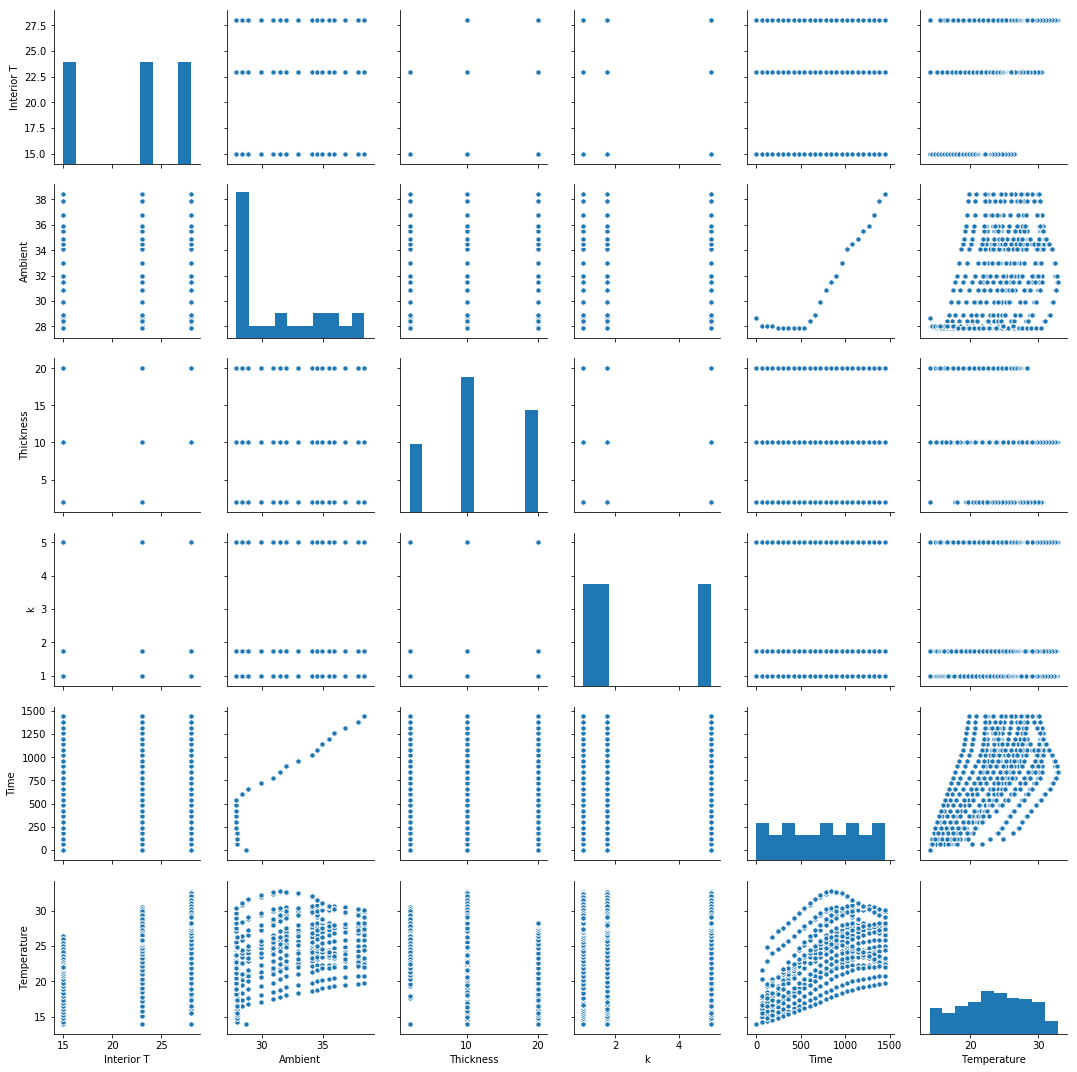

<Figure size 3600x3600 with 0 Axes>

In [13]:
sns.pairplot(data,markers="h")
print('Pair Plot:')
plt.figure(dpi=300, figsize=(12,12))
plt.show()


In this stage, we split the data into training and testing subsets (20 % of the data is allocated for testing)

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=0)

For convenience, a function is defined to run the model and print the associated error using different error metrics

In [15]:
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    RMSE=np.sqrt(mean_squared_error(dtesty,prediction))
    MAE=mean_absolute_error(dtesty, prediction)
    MSE = metrics.mean_squared_error(y_test, prediction)
    print ("MEAN SQUARED ERROR (MSE) :", MSE )   
    print ("***************************************************************************")
    print ("ROOT MEAN SQUARED ERROR (RMSE) :", RMSE )
    print ("***************************************************************************")
    print ("Relative ROOT MEAN SQUARED ERROR (RRMSE) :", 100*RMSE/(np.mean(dtesty)) )
    print ("***************************************************************************")
    print ("MAE is: ", MAE )
    print ("***************************************************************************")
    print ("RMAE :", 100*MAE/(np.mean(dtesty)) )
    print ("***************************************************************************")
    print ("R-Squared is: ", r2_score(dtesty, prediction) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=5,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(dpi=300, figsize=(12,12))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["Temperature"]
    
#     fontname = 'Times New Roman'
        
    ax = testy.plot(label="Observed",linewidth=3, color = "Blue", linestyle="-.")
    ax = prediction[0].plot(label = "Predictions",linewidth=3,  color = "Green")

    plt.title("RFR Model",  fontsize=20)
    plt.legend(loc=0, prop={'size': 15}, ncol=4)
    plt.xlabel("Test Sample Index", fontsize=15)
    plt.ylabel("Output Value (Temperature)", fontsize=15)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_facecolor("w")
    plt.figure(figsize=(12,12))
#     plt.subplot(211)
    
    if of_type == "coef":
        plt.figure(dpi=300, figsize=(12,12))
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0], palette="dark",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        
        ax1.set_facecolor("white")
        sns.set_style('whitegrid')
        ax1.axhline(0,color="k",linewidth=2)
        ax2.tick_params(axis='both', labelsize=12)
        plt.ylabel("Feature Importance", fontsize=15)
        plt.xlabel("Features", fontsize=15)
        plt.title('FEATURE IMPORTANCES')
        plt.figure(dpi=300, figsize=(12,12))
    
    elif of_type == "feat":
        plt.figure(dpi=300, figsize=(12,10))
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="deep",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        hatches =['/', '//', '+++', '---', 'xx', '\\', '***', 'oo', '////?', '....']
        for i,thisbar in enumerate(ax2.patches):
        # Set a different hatch for each bar
            thisbar.set_hatch(hatches[i])
        ax2.set_facecolor("white")
        ax2.axhline(0,color="k",linewidth=2)
        ax2.tick_params(axis='both', labelsize=12)
        sns.set_style('whitegrid')
        plt.ylabel("Feature Importance", fontsize=15)
        plt.xlabel("Features", fontsize=15)
        plt.title('FEATURE IMPORTANCES')
        plt.figure(dpi=300, figsize=(12,10))
        handles, labels = ax2.get_legend_handles_labels()
        ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=10, fancybox=True, shadow=True)

import warnings
warnings.filterwarnings("ignore")

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.14, loss='ls', max_depth=2, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)
***************************************************************************
MEAN SQUARED ERROR (MSE) : 1.8201986822049254
***************************************************************************
ROOT MEAN SQUARED ERROR (RMSE) : 1.3491473908379785
***************************************************************************
Relative ROOT MEAN SQUARED ERROR (RRMSE) : 5.800936661007177
***************************************************************************
MAE is:  0.8595041683584909
**********************************************************

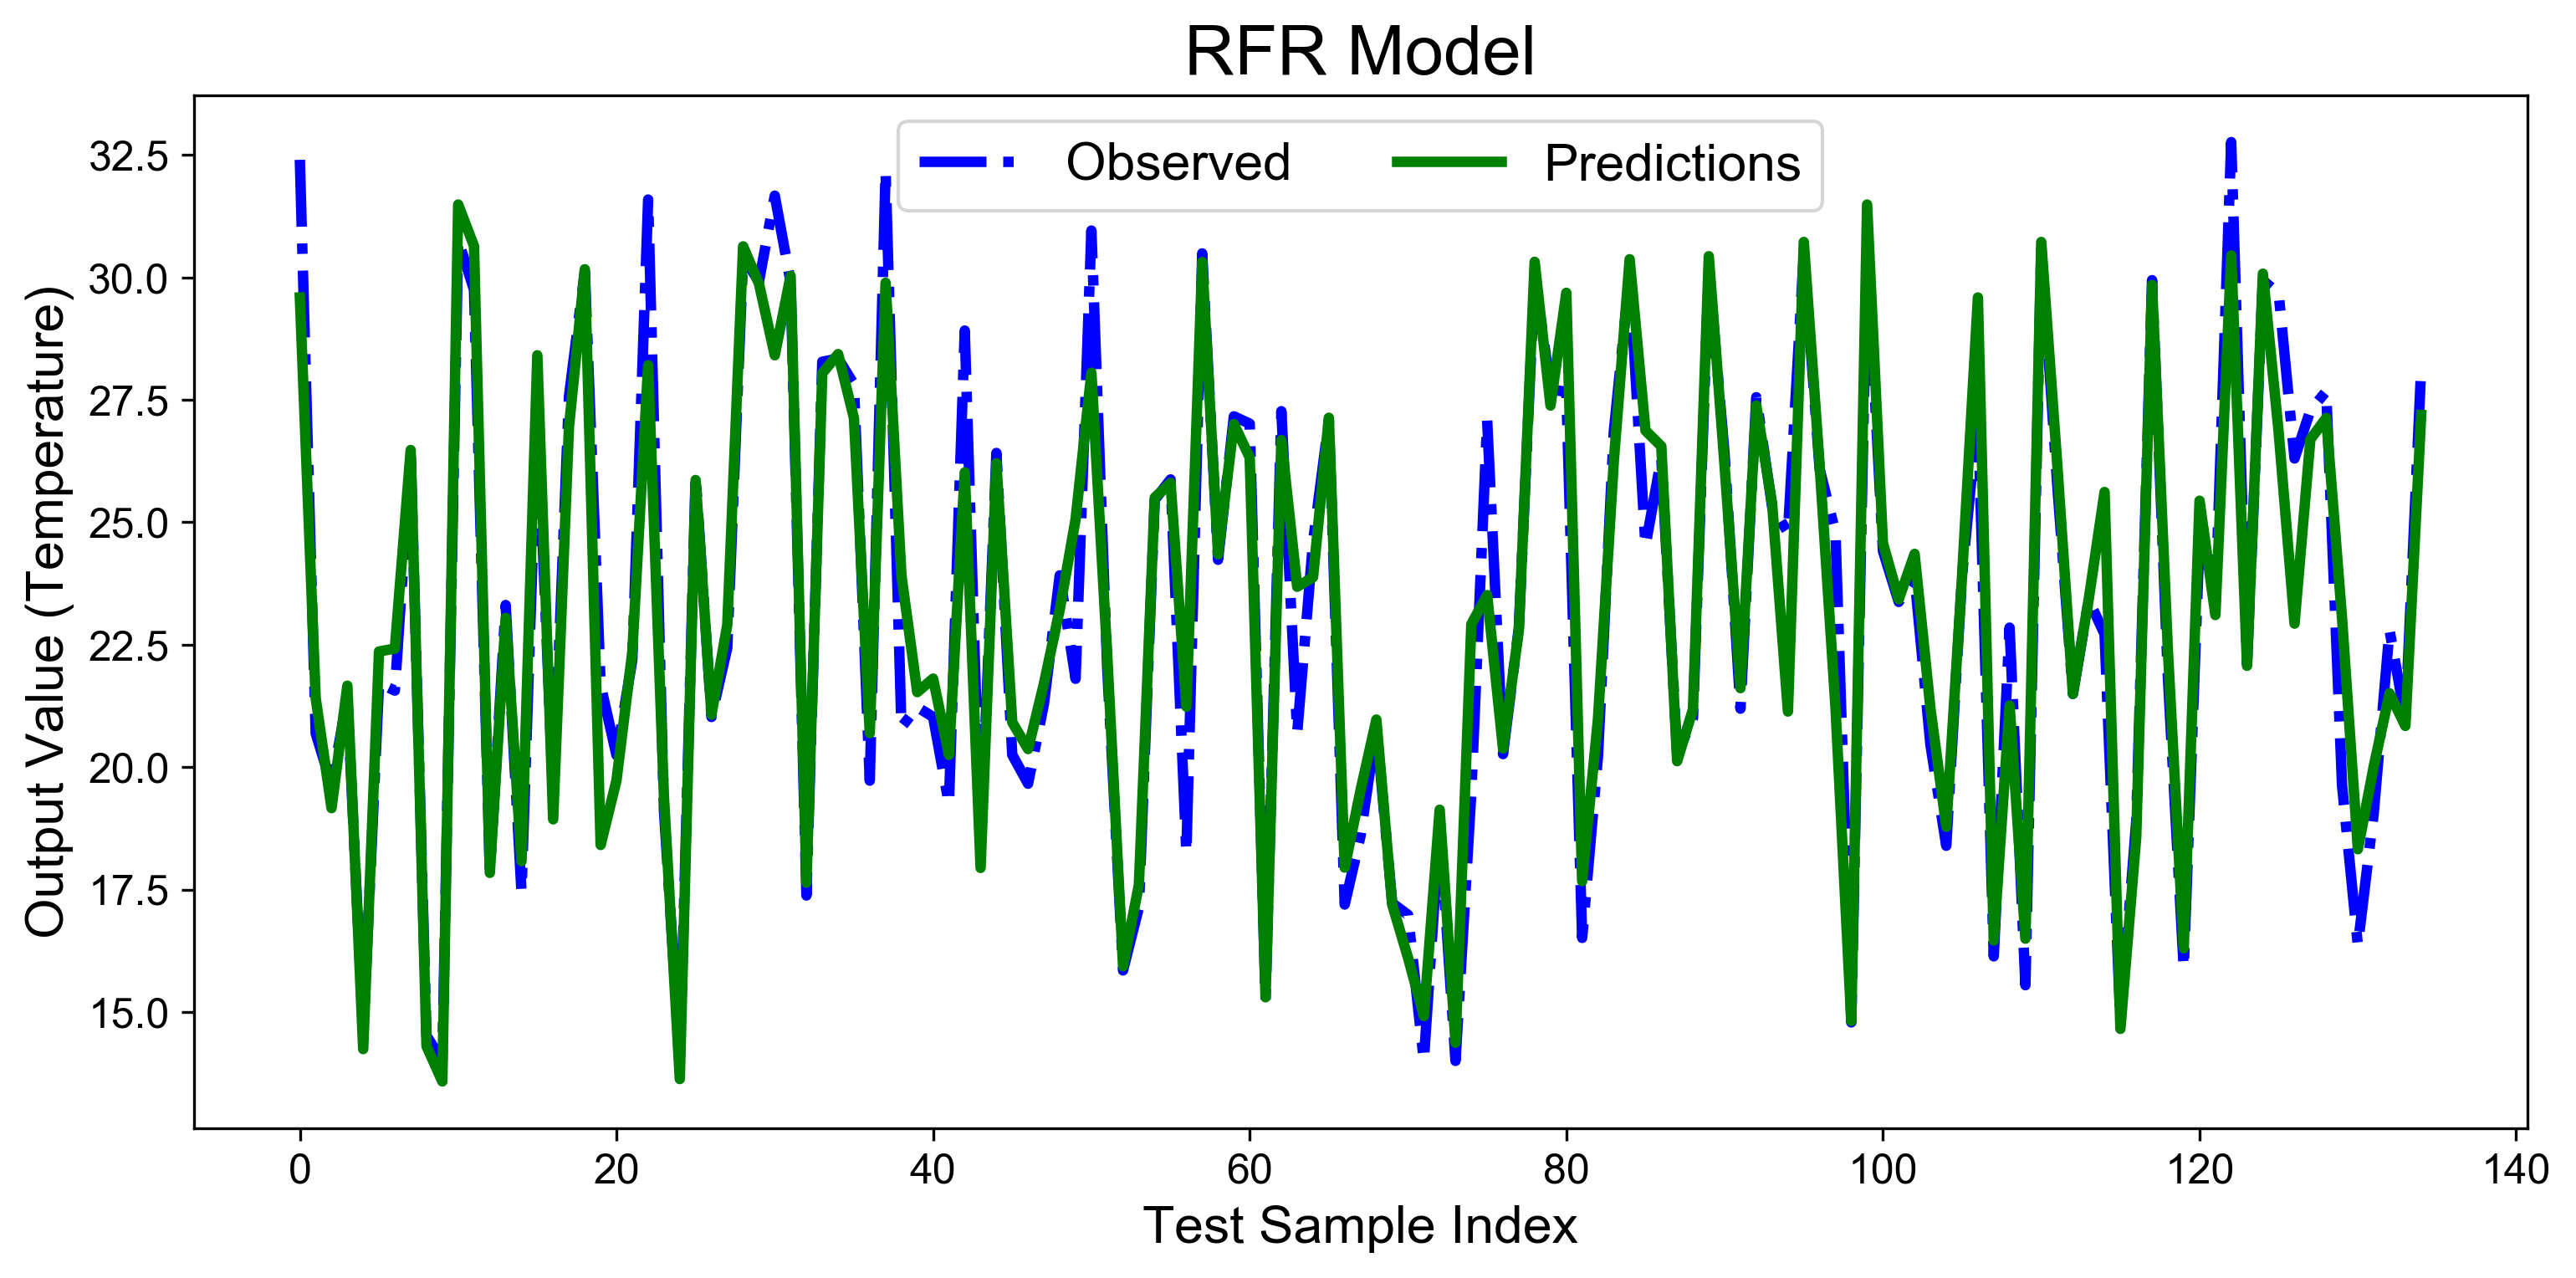

<Figure size 864x864 with 0 Axes>

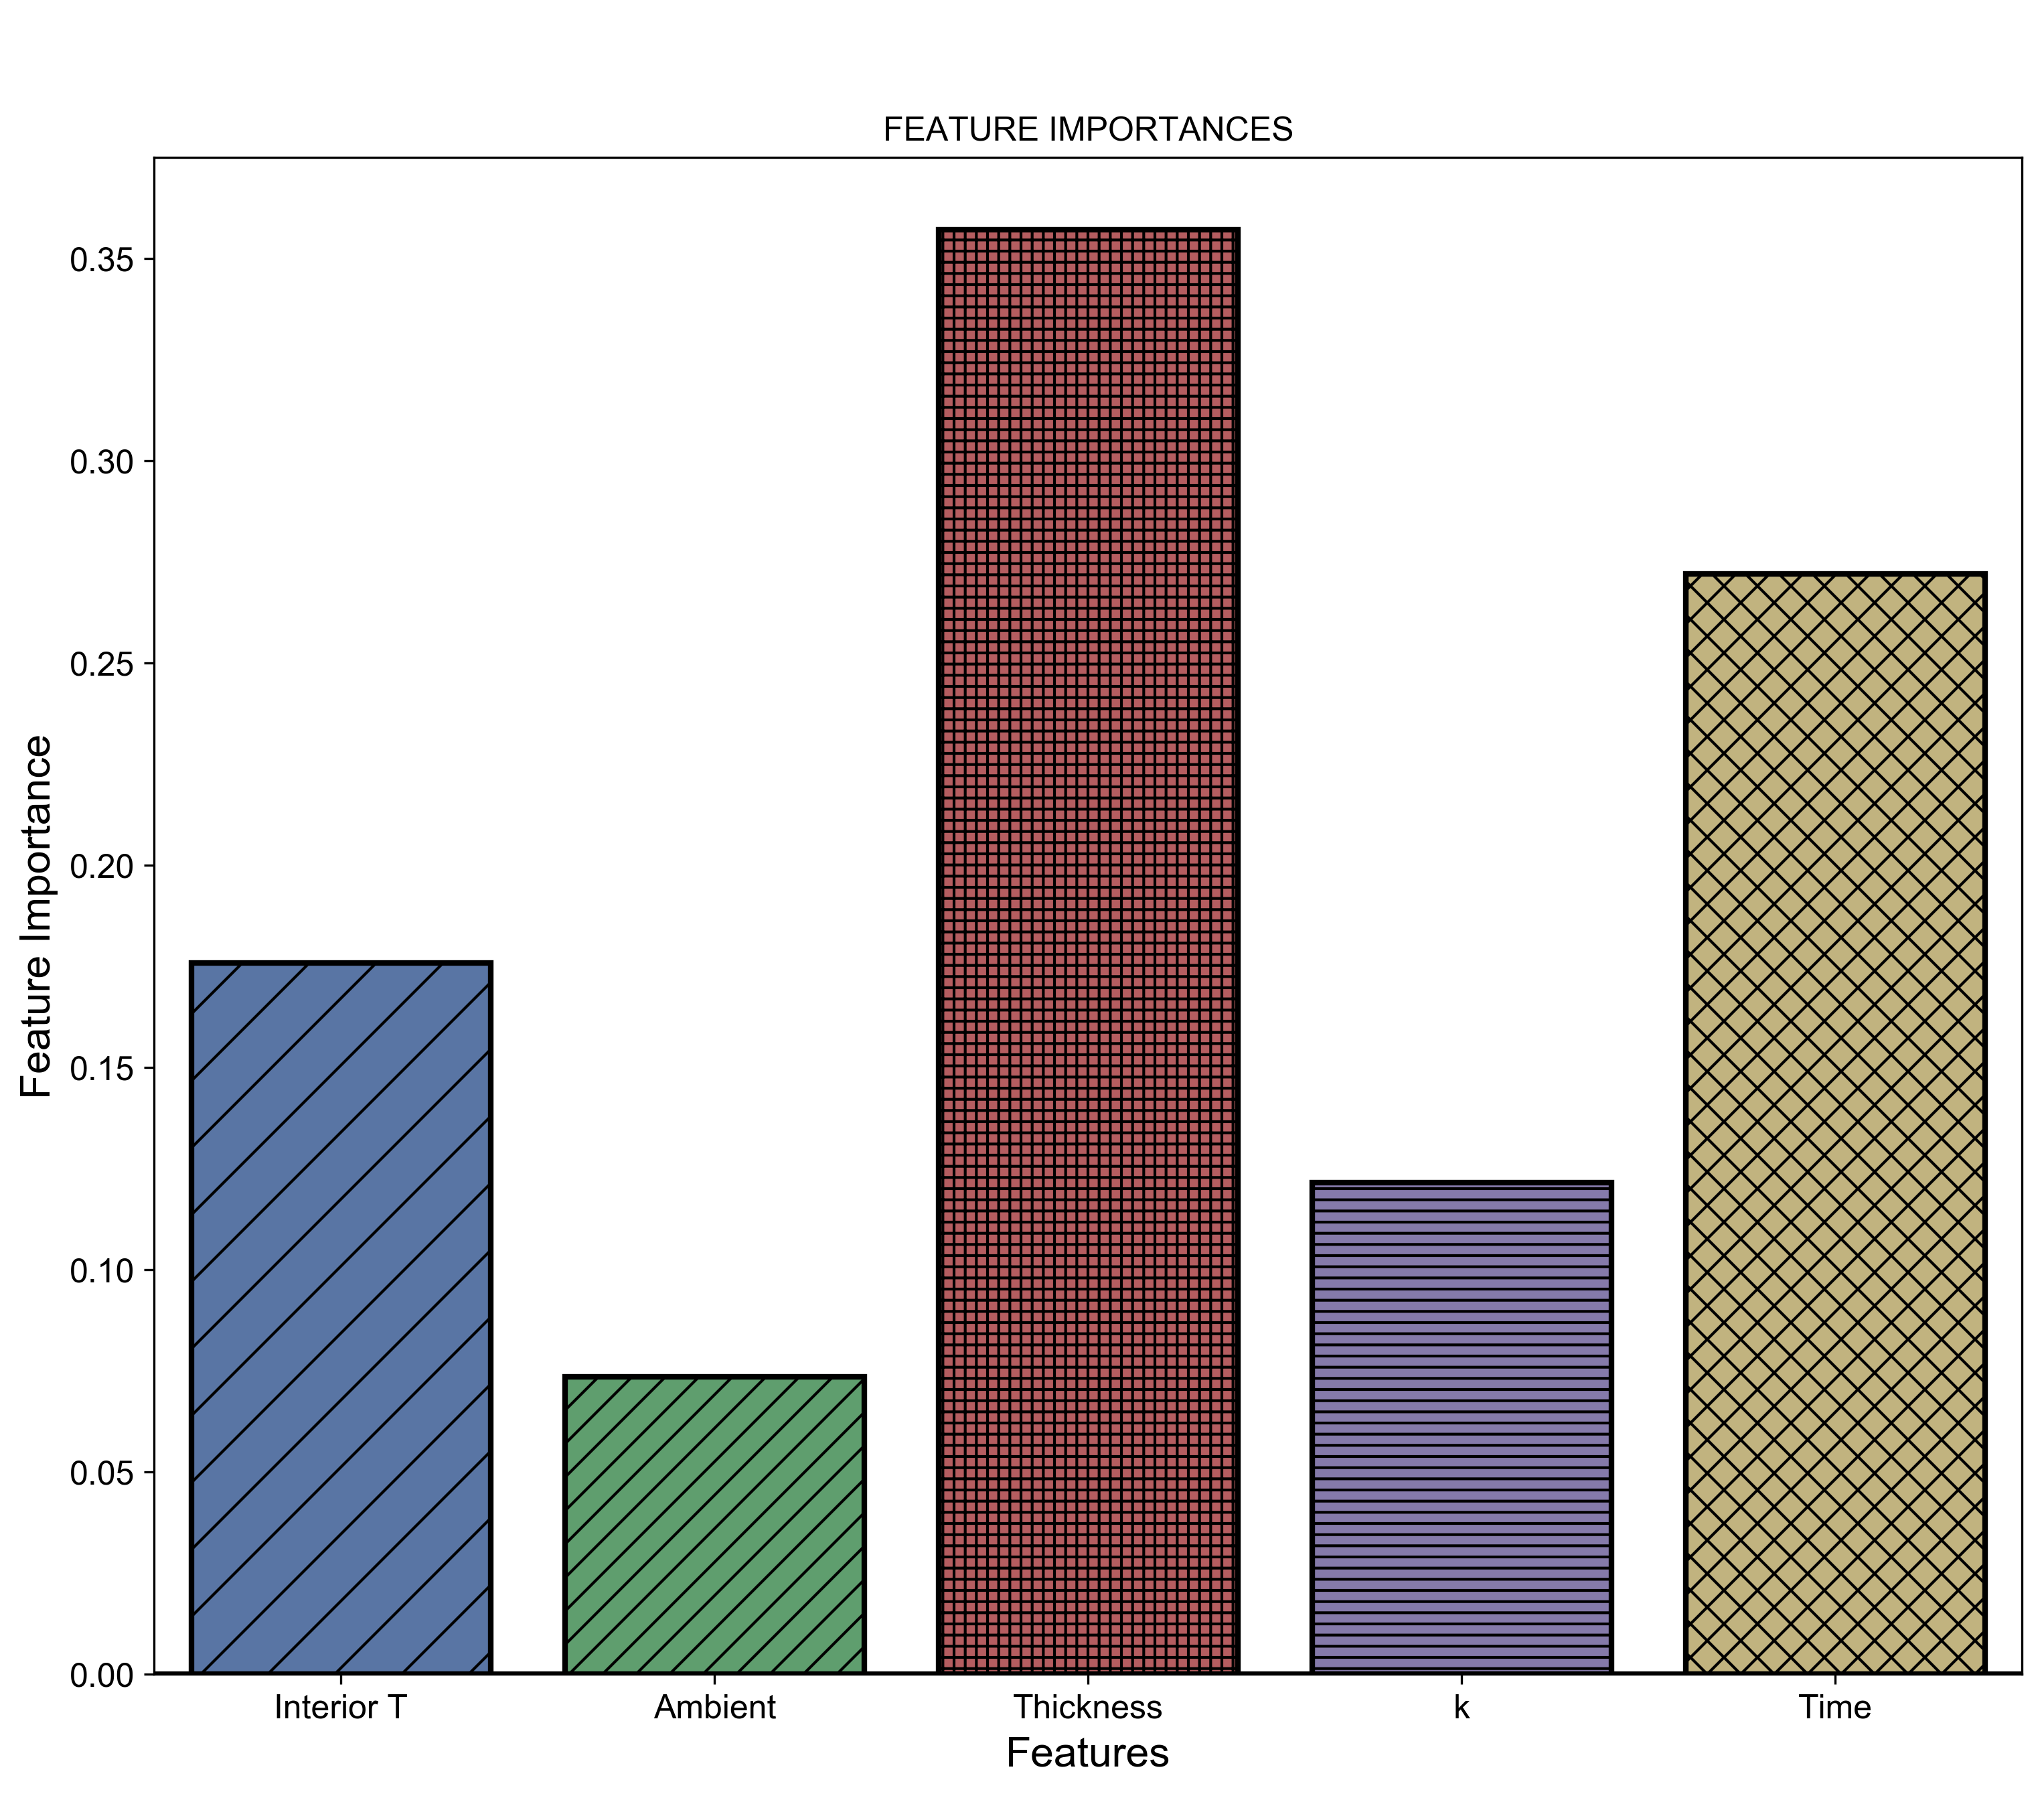

<Figure size 3600x3000 with 0 Axes>

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
gbr = GradientBoostingRegressor(n_estimators=600, learning_rate=0.14, min_samples_split=5, min_samples_leaf=10, max_depth=2, max_features= 4, random_state=0)
model(gbr,X_train,y_train,X_test,y_test,"feat")
predictions = gbr.predict(X_test)
pred2=gbr.predict(X_train)
from sklearn.metrics import r2_score
R2=r2_score(y_test, predictions)
print('R-Squared is: ',R2 )


Now, we use YellowBrick visualization class for better presentation of the results 

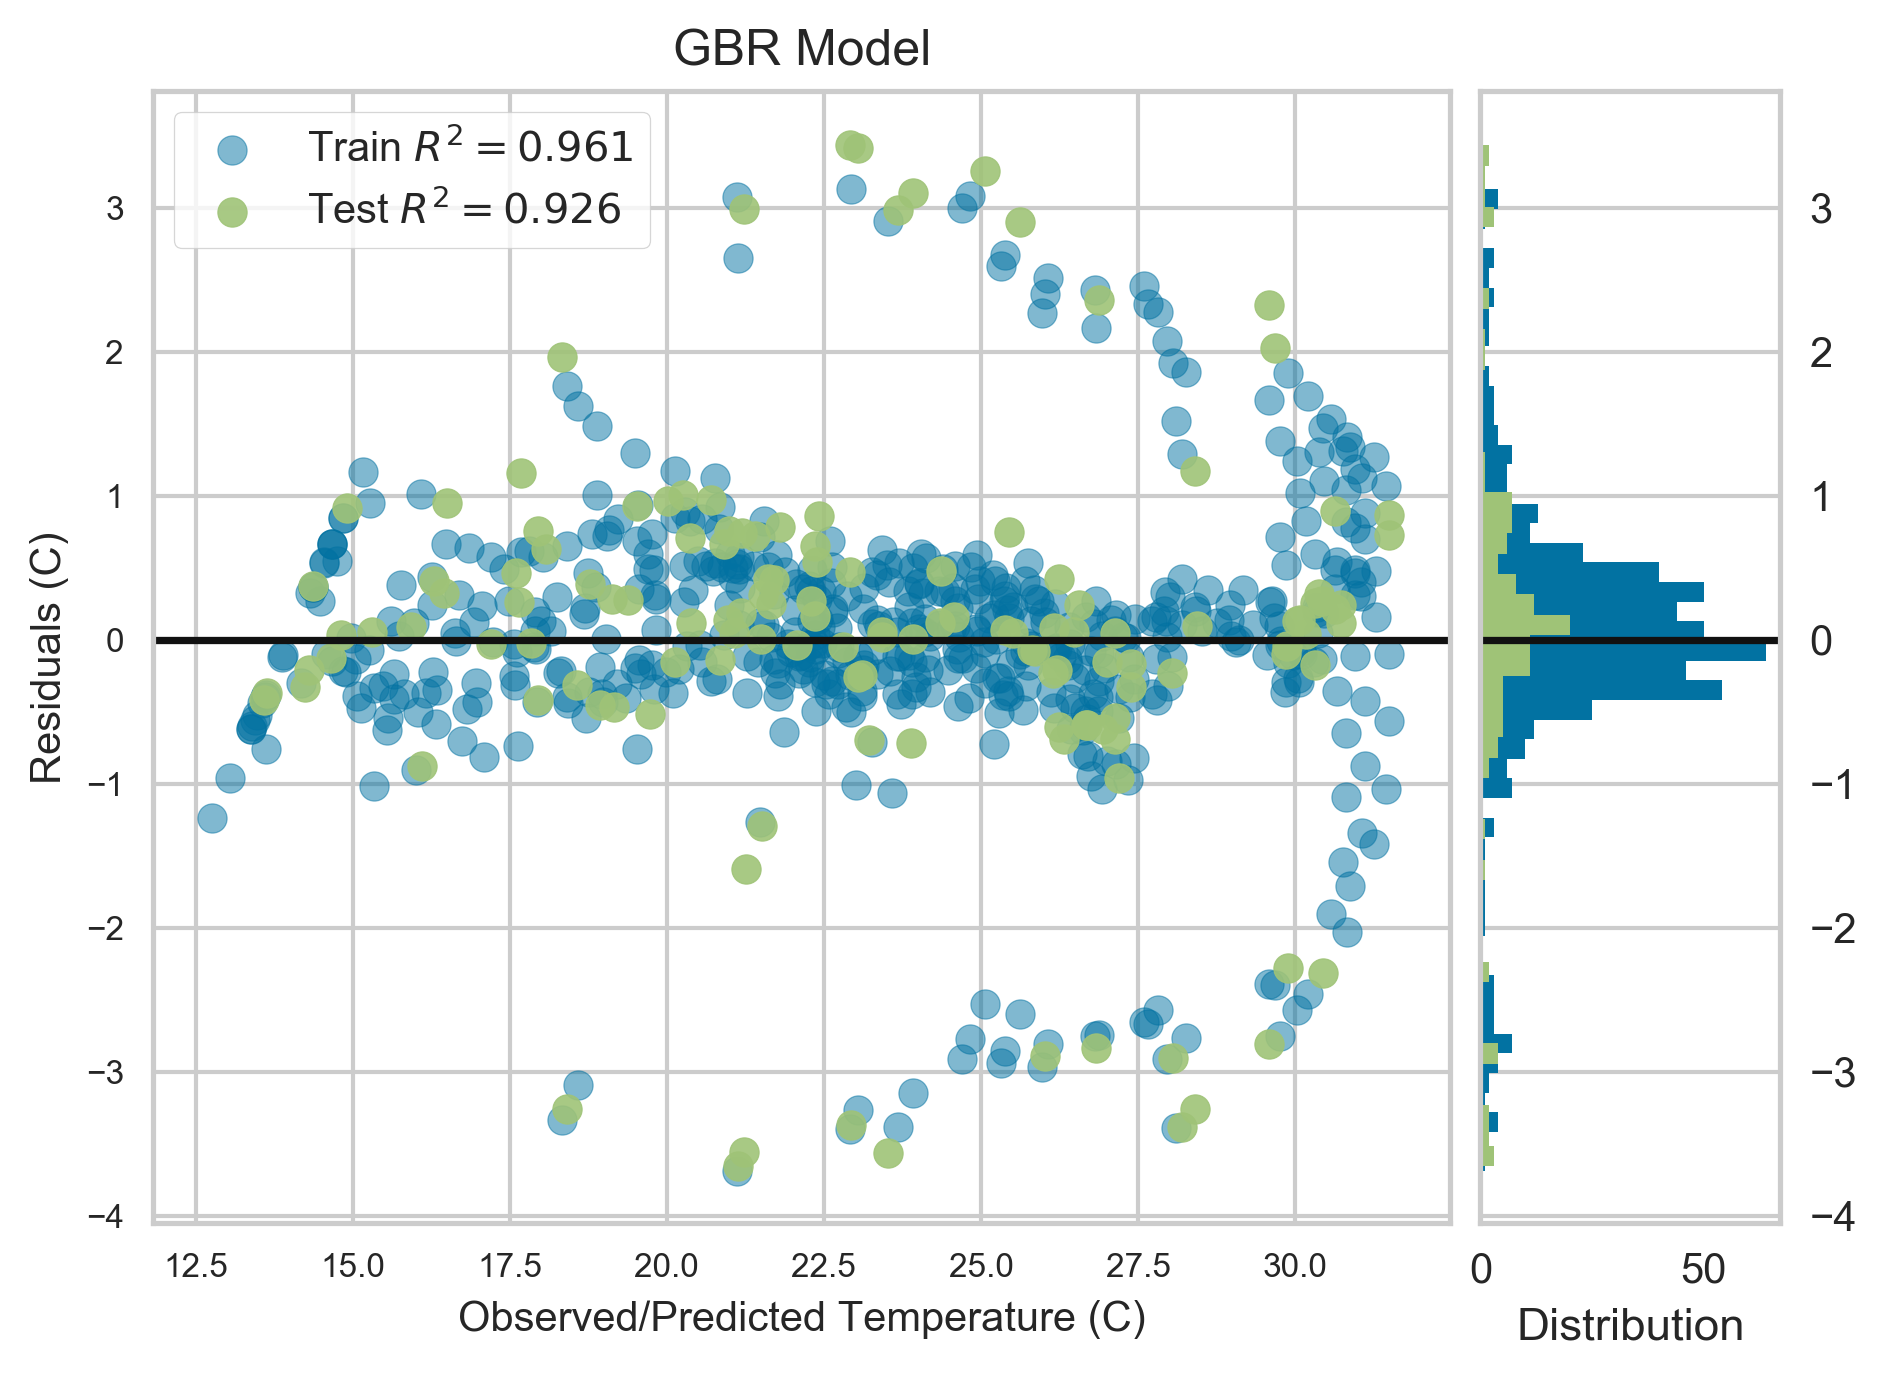

In [16]:
#Yellowbrick
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
plt.rcParams[('figure.figsize')]=(7,5)
plt.rcParams[('figure.dpi')]=300
my_title="GBR Model"

visualizer = ResidualsPlot(gbr, title=my_title)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
visualizer.finalize()
visualizer.ax.set_xlabel("Observed/Predicted Temperature (C)", fontsize=10)
visualizer.ax.set_ylabel("Residuals (C)", fontsize=10)
visualizer.ax.tick_params(axis='both', labelsize=8)


In [17]:
#Random Search with Cross Validation
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 21)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 145, 190, 235, 280, 325, 370, 415, 460, 505, 550, 595, 640, 685, 730, 775, 820, 865, 910, 955, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
***************************************************************************
MEAN SQUARED ERROR (MSE) : 3.7531663949328418
***************************************************************************
ROOT MEAN SQUARED ERROR (RMSE) : 1.9373090602515752
***************************************************************************
Relative ROOT MEAN SQUARED ERROR (RRMSE) : 8.329858714943283
***************************************************************************
MAE is:  1.020079372398557
***************************************************************************
RMAE : 4.38604104241611
*****************************

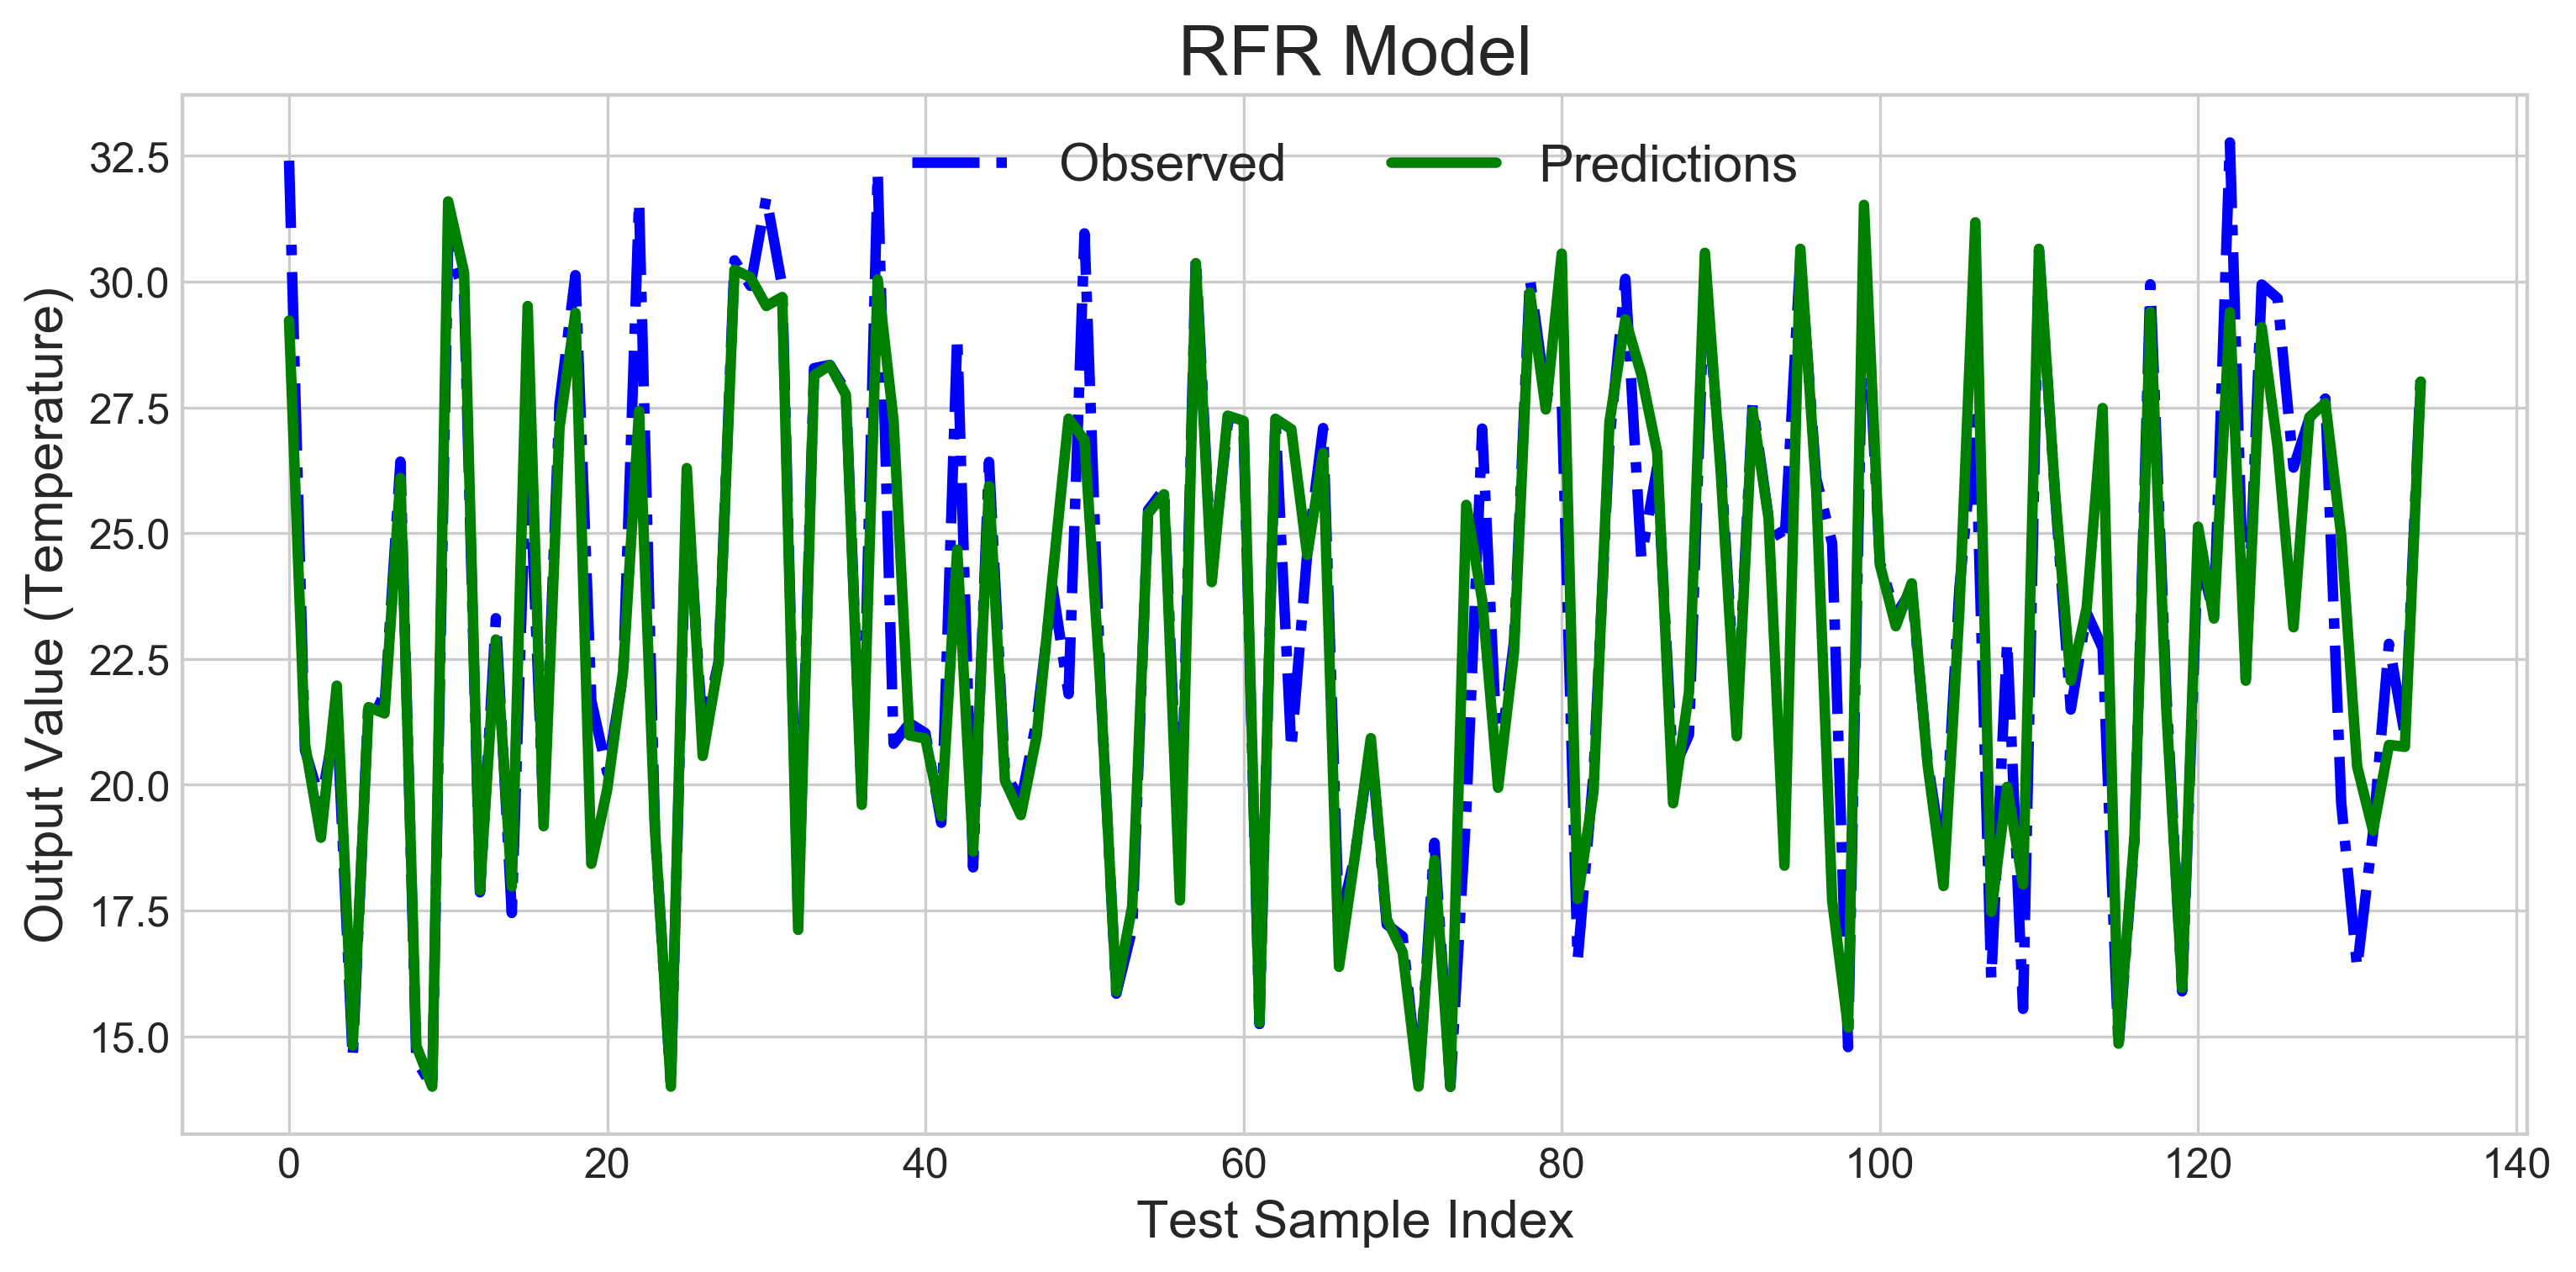

<Figure size 864x864 with 0 Axes>

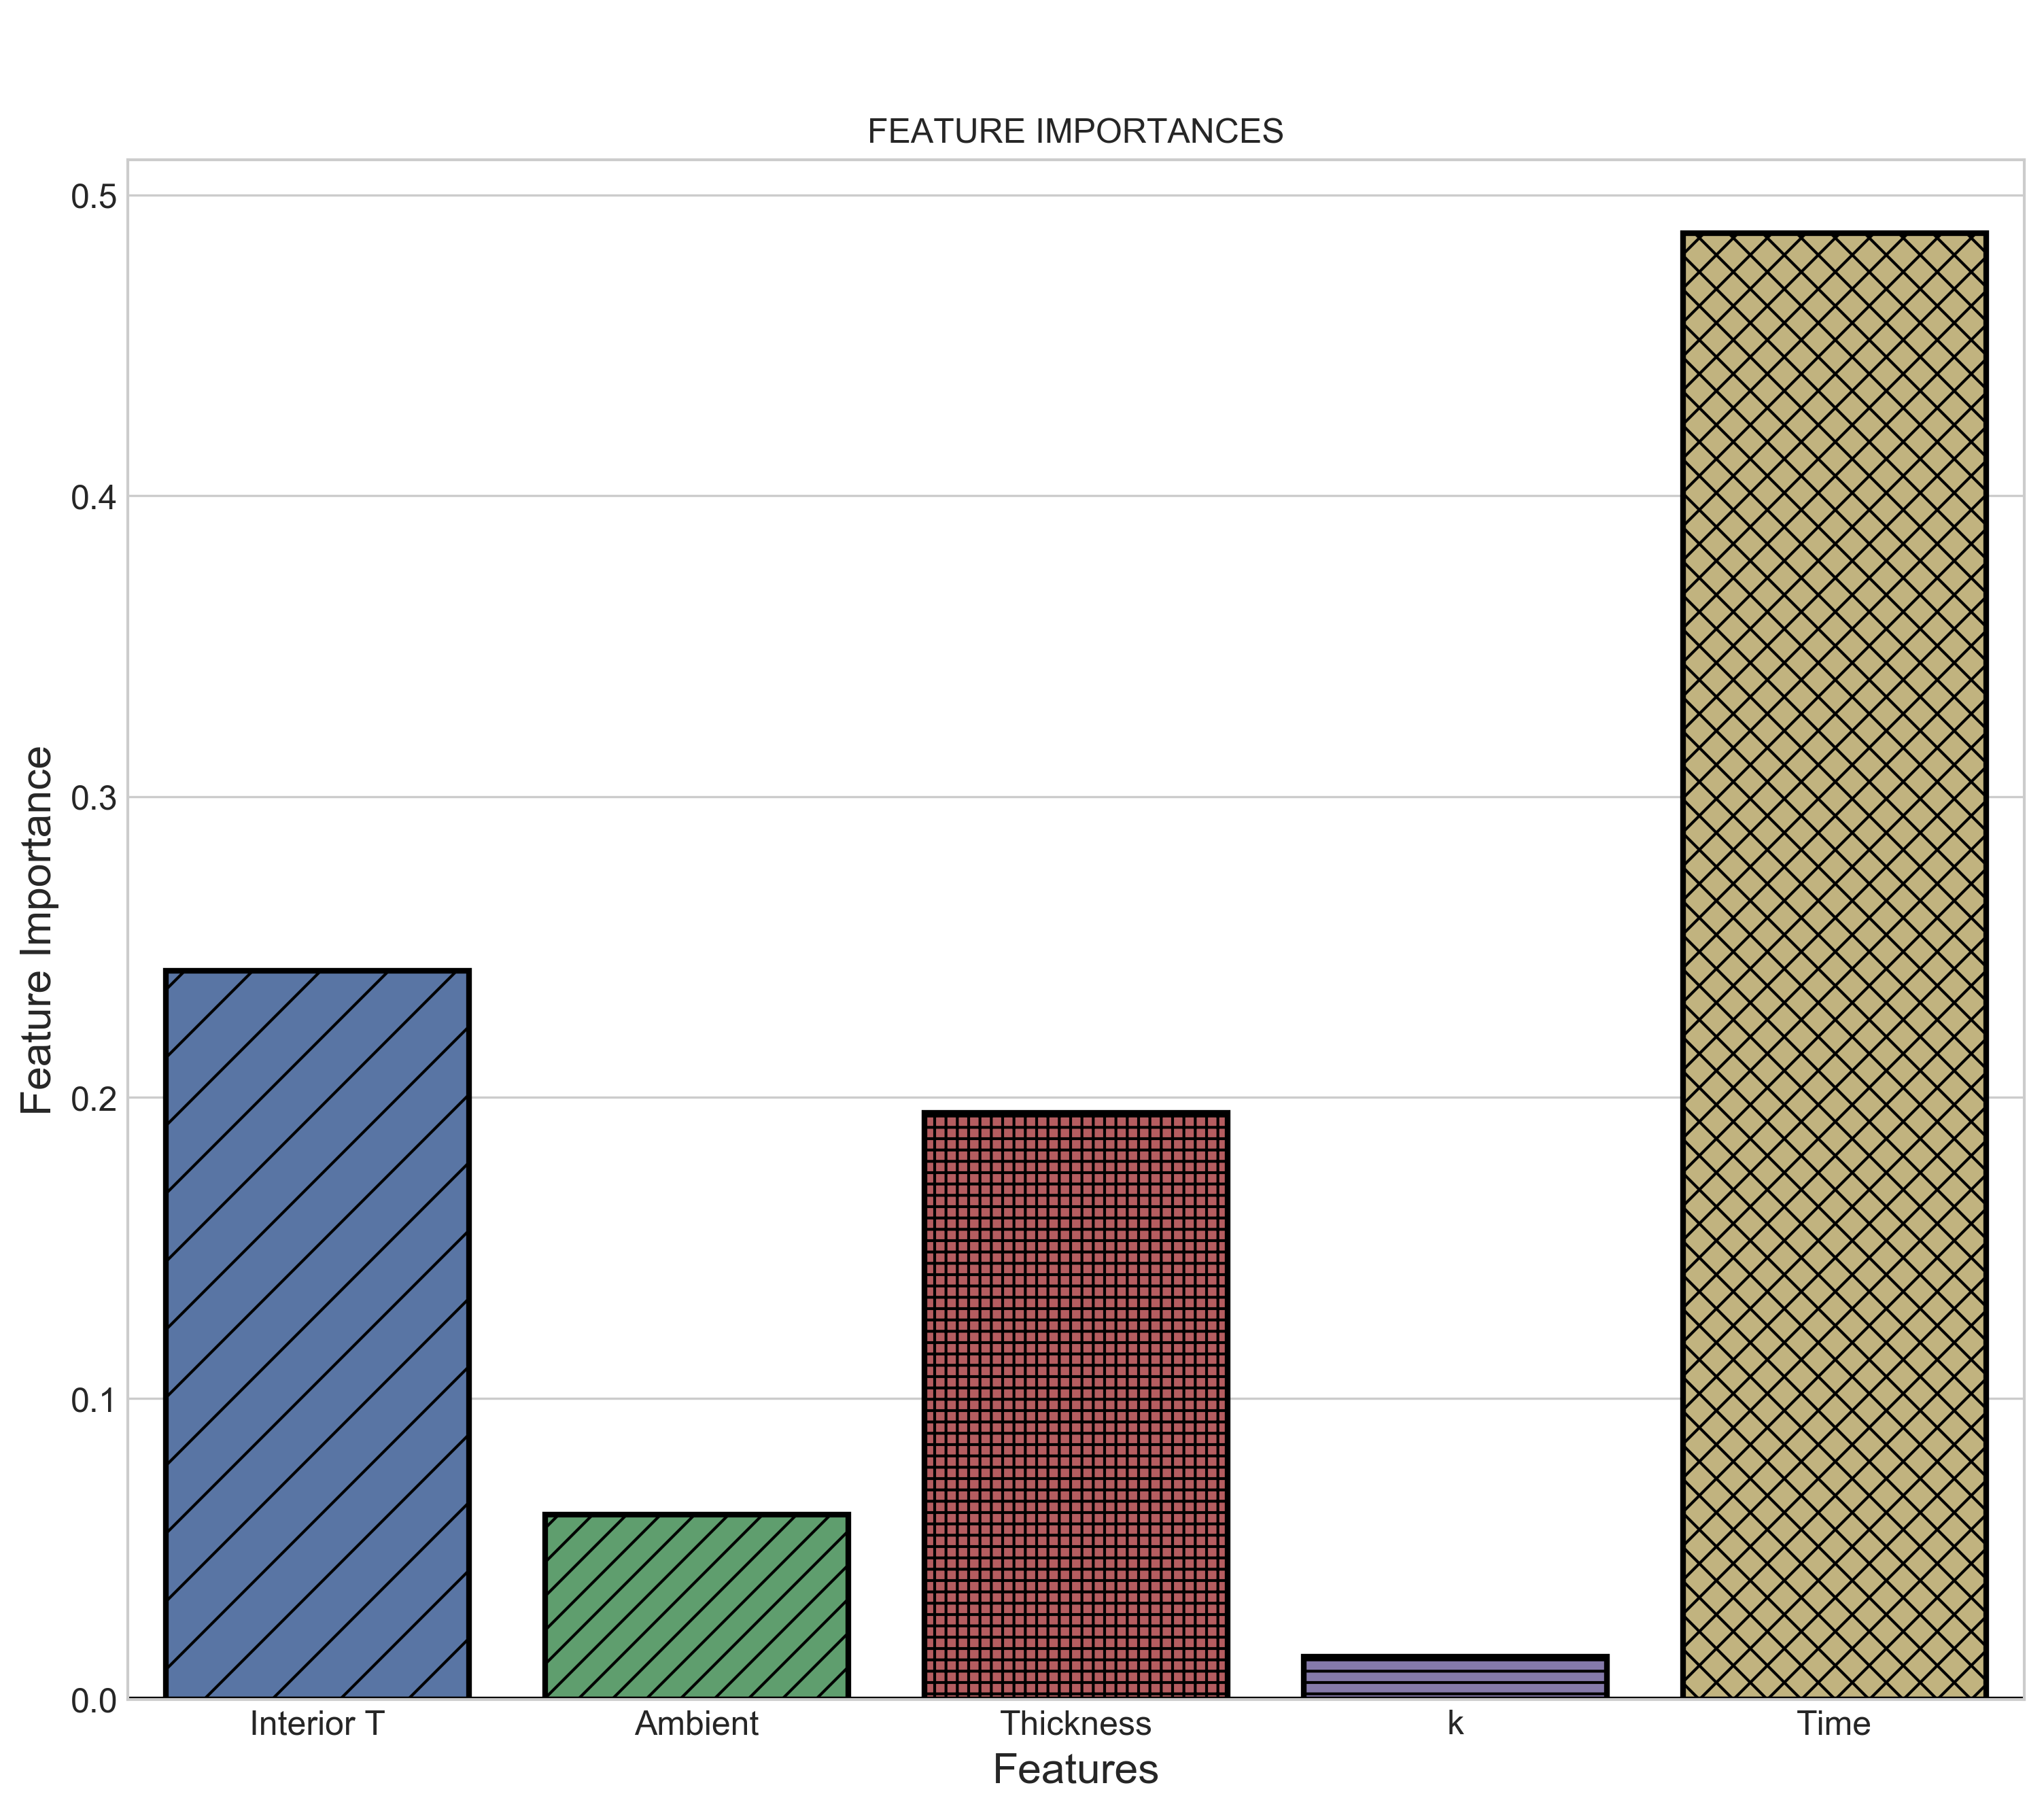

<Figure size 3600x3000 with 0 Axes>

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
model(rf,X_train,y_train,X_test,y_test,"feat")

In [22]:
#Random Search Training

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   57.6s finished


In [23]:
# view the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 325,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 12,
 'bootstrap': True}